#### Steps to solve the problem :
Importing Libraries.

Data Understanding / Exploration of data.

Data Visualization.

Clustering using K-Means.

Selection of Clusters.

Ploting the Cluster Boundry and Clusters.

3D Plot of Clusters.

In [6]:
# Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans

In [46]:
!pip install plotly

You should consider upgrading via the 'C:\Users\shilpa v gowda\anaconda3\python.exe -m pip install --upgrade pip' command.


In [50]:
import plotly as py
import plotly.graph_objs as go

import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
print(os.listdir("../input"))

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../input'

## Data Understanding / Exploration of data

In [7]:
#setup

customers = pd.read_csv('Mall_Customers.csv')

customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# call describe() on the data 
#to see the descriptive statistics for each variable. 

In [9]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
# returns the total number of rows and columns in the data set
customers.shape

(200, 5)

In [11]:
customers.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [12]:
# returns the columns name in the data set
customers.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [13]:
# checks for the null values.

customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
# returns the boolean values 
# i.e., 'False' means no null values in the dataset.

customers.isnull().any(axis = 1)

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [15]:
# retuns the number of unique values in a particular column.

customers['Gender'].nunique()

2

In [16]:
# whereas, unique() 
#retuns the which are those unique values in a particular column.

customers['Gender'].unique()

array(['Male', 'Female'], dtype=object)

## Data Visualization

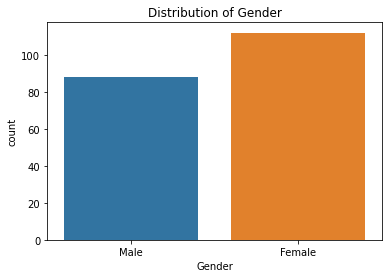

In [17]:
# See the distribution of gender to recognize different distributions.

sns.countplot(x = 'Gender', data = customers)
plt.title('Distribution of Gender')
plt.show()

In [18]:
# Create the histogram of the 'ages'.

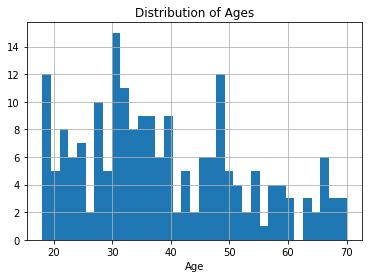

In [19]:
customers.hist('Age', bins = 35)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.show()

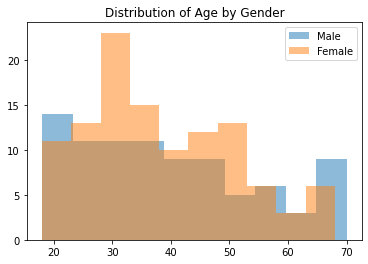

In [20]:
# Overlaying two histograms 
# i.e.,Creating one histogram for each gender

plt.hist('Age', data = customers[customers['Gender'] == 'Male'], alpha = 0.5, label = 'Male')
plt.hist('Age', data = customers[customers['Gender'] == 'Female'], alpha = 0.5, label = 'Female')
plt.title('Distribution of Age by Gender')
plt.legend()
plt.show()

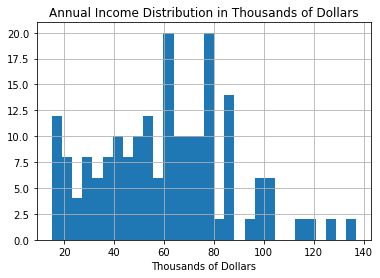

In [21]:
# plotting the ANNUAL INCOME DISTRIBUTION

customers.hist('Annual Income (k$)', bins = 30)
plt.title('Annual Income Distribution in Thousands of Dollars')
plt.xlabel('Thousands of Dollars')
plt.show()

In [22]:
# Distibution of INCOME by GEMDER.

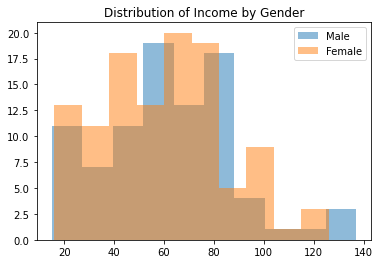

In [23]:
plt.hist('Annual Income (k$)', data = customers[customers['Gender'] == 'Male'], alpha = 0.5, label = 'Male')
plt.hist('Annual Income (k$)', data = customers[customers['Gender'] == 'Female'], alpha = 0.5, label = 'Female')
plt.title('Distribution of Income by Gender')
plt.legend()
plt.show()

In [24]:
# Create data sets by gender.
# Since gender seems to significantly impact other variables.

male_customers = customers[customers['Gender'] == 'Male']
female_customers = customers[customers['Gender'] == 'Female']

In [25]:
# Print the average spending score for men and women

print(male_customers['Spending Score (1-100)'].mean())
print(female_customers['Spending Score (1-100)'].mean())

48.51136363636363
51.526785714285715


From the above resultant, Men has an average spending of 48.5 and women had an average of 51.5.
Women earned less, but spent more at this mall in this data set

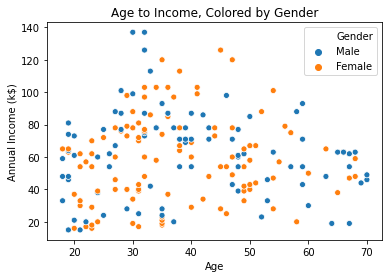

In [26]:
# Scatter Plot

sns.scatterplot('Age', 'Annual Income (k$)', hue = 'Gender', data = customers)
plt.title('Age to Income, Colored by Gender')
plt.show()

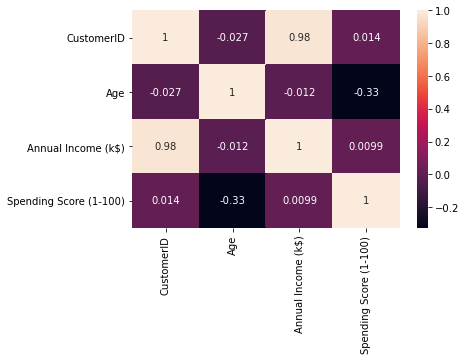

In [27]:
# heat map

sns.heatmap(customers.corr(), annot = True)
plt.show()

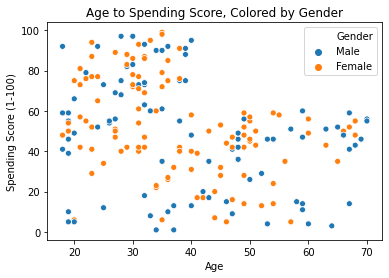

In [28]:
sns.scatterplot('Age', 'Spending Score (1-100)', hue = 'Gender', data =customers)
plt.title('Age to Spending Score, Colored by Gender')
plt.show()

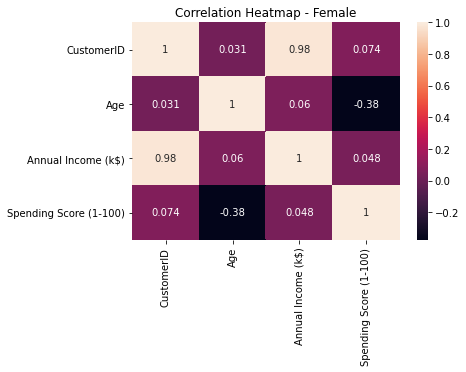

In [29]:
sns.heatmap(female_customers.corr(), annot=True);
plt.title('Correlation Heatmap - Female');
plt.show()

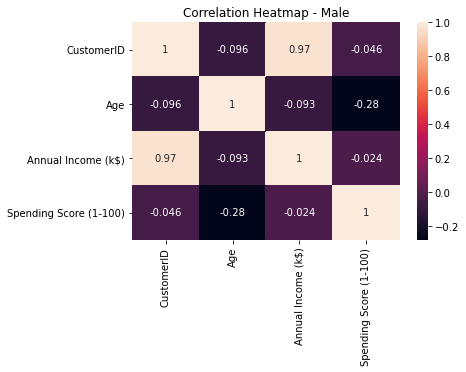

In [30]:
sns.heatmap(male_customers.corr(), annot=True);
plt.title('Correlation Heatmap - Male');
plt.show()

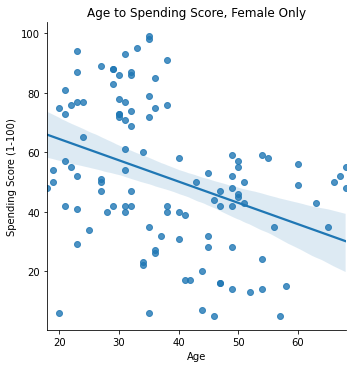

In [31]:
# plot for age to spending score

sns.lmplot('Age', 'Spending Score (1-100)', data=female_customers);
plt.title('Age to Spending Score, Female Only');
plt.show()

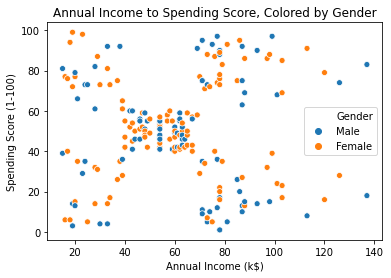

In [32]:
# income to spending score colored by gender 

sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', hue='Gender', data=customers);
plt.title('Annual Income to Spending Score, Colored by Gender');
plt.show()

#### Histograms

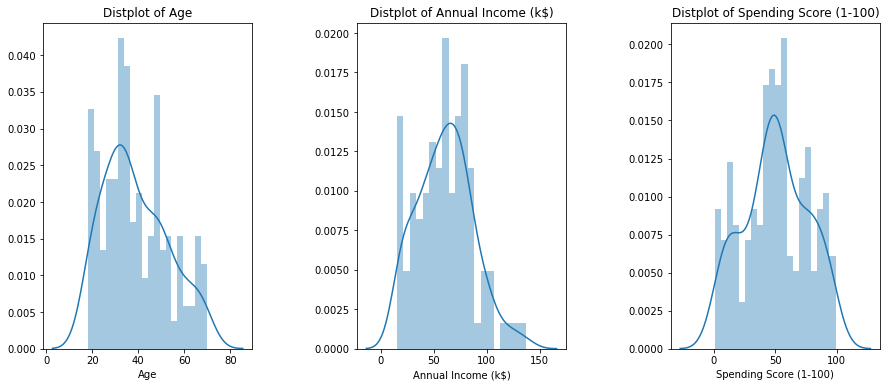

In [34]:
plt.figure(1,figsize = (15,6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(customers[x], bins = 20)
    plt.title('Distplot of {}'.format(x))
    
plt.show()

### Count Plot of Gender

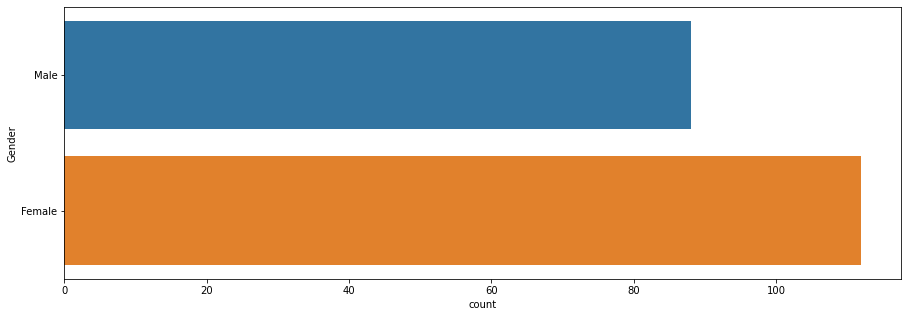

In [35]:
plt.figure(1, figsize = (15,5))
sns.countplot(y = 'Gender', data = customers)
plt.show()

### Ploting the Relation between Age , Annual Income and Spending Score

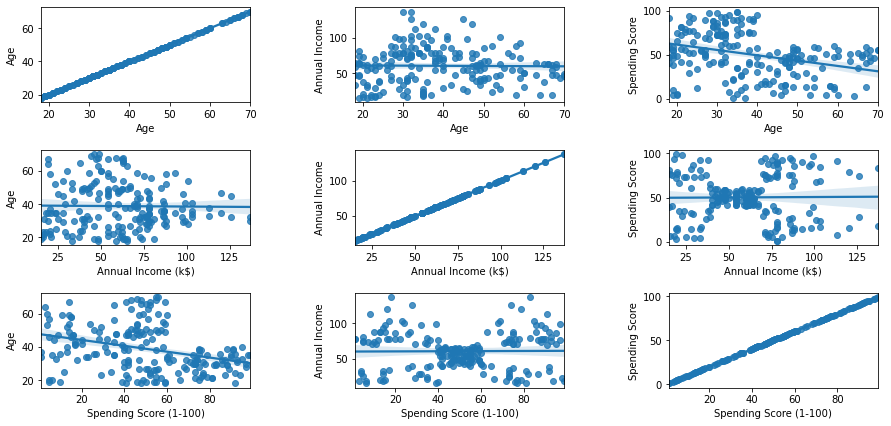

In [36]:
plt.figure(1, figsize = (15,7))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    for y in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3,3,n)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(x = x, y = y, data = customers)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y)
        
plt.show()

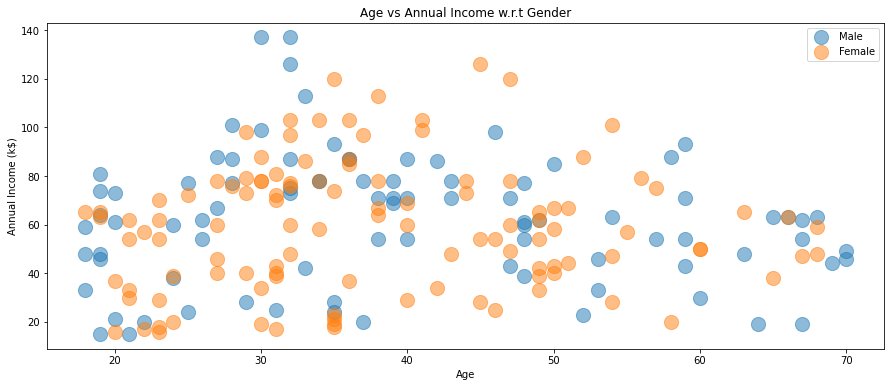

In [38]:
plt.figure(1, figsize = (15,6))
for gender in ['Male', 'Female']:
    plt.scatter(x = 'Age', y = 'Annual Income (k$)', data = customers[customers['Gender'] == gender],
               s = 200, alpha = 0.5, label = gender)
    
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()
    

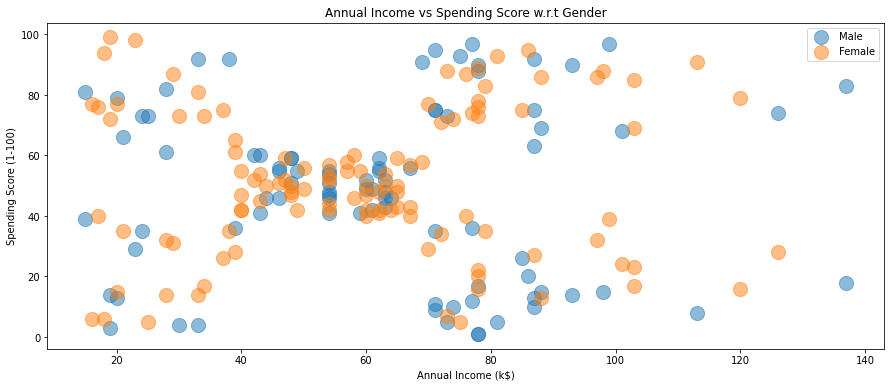

In [39]:
plt.figure(1, figsize = (15,6))
for gender in ['Male', 'Female']:
    plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)',
               data = customers[customers['Gender'] == gender], s = 200, alpha = 0.5, label = gender)
    
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

### Clustering using K- means

In [ ]:
# 1.Segmentation using Age and Spending Score

In [59]:
'''Age and spending Score'''

X1 = customers[['Age', 'Spending Score (1-100)']].iloc[: , :].values
inertia = []

for n in range(1,11):
    algorithm = (KMeans(n_clusters = n, init = 'k-means++', n_init = 10, max_iter = 300,
                       tol = 0.0001, random_state = 111, algorithm = 'elkan'))
    
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

### Selecting N Clusters based on Inertia (Squared Distance between Centroids and data points, should be less)

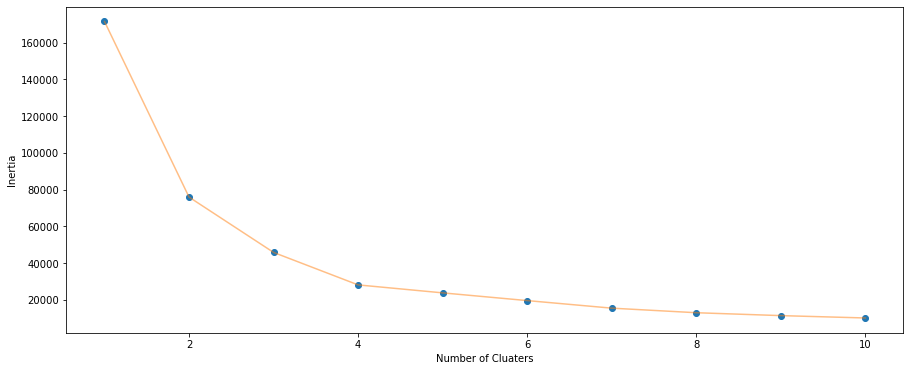

In [62]:
plt.figure(1, figsize = (15,6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Cluaters') , plt.ylabel('Inertia')
plt.show()

In [63]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [64]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

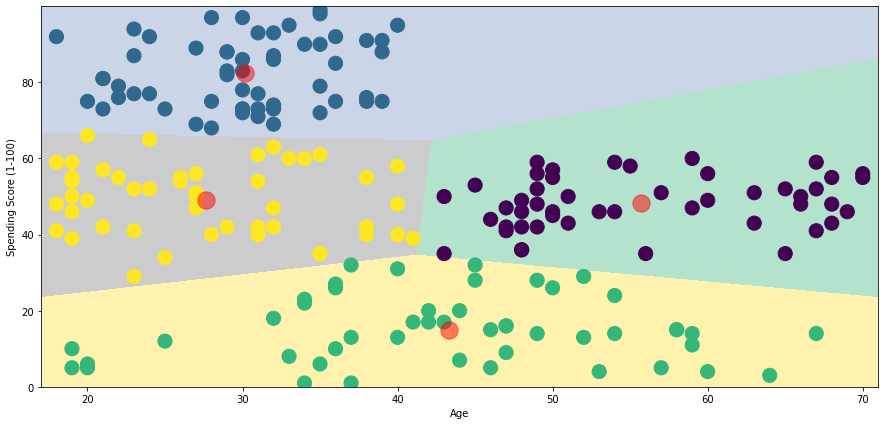

In [66]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)1
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = customers , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

### 2. Segmentation using Annual Income and Spending Score

In [71]:
'''Annual Income and spending Score'''
X2 = customers[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

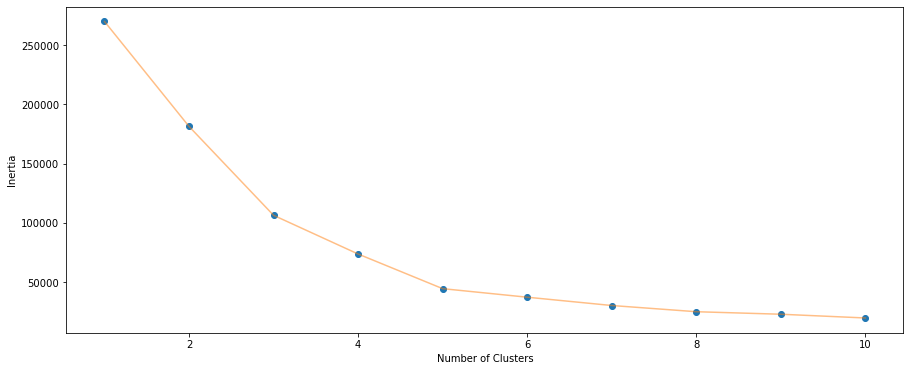

In [72]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [73]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [75]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

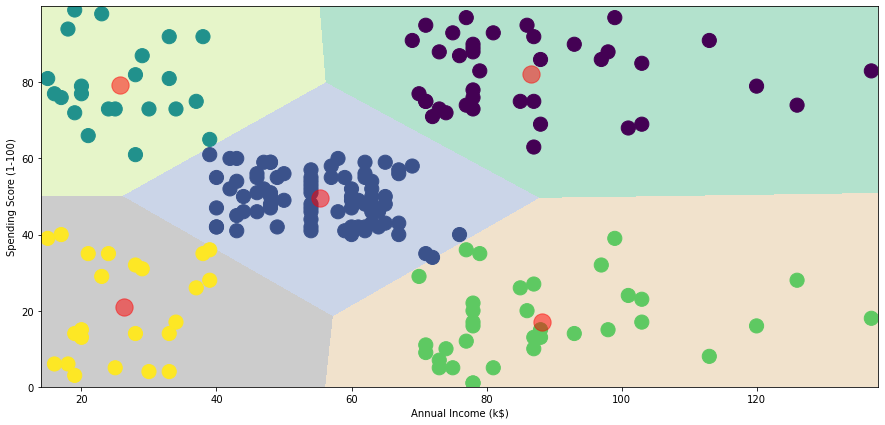

In [77]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = customers , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

### 3.Segmentation using Age , Annual Income and Spending Score

In [80]:
X3 = customers[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

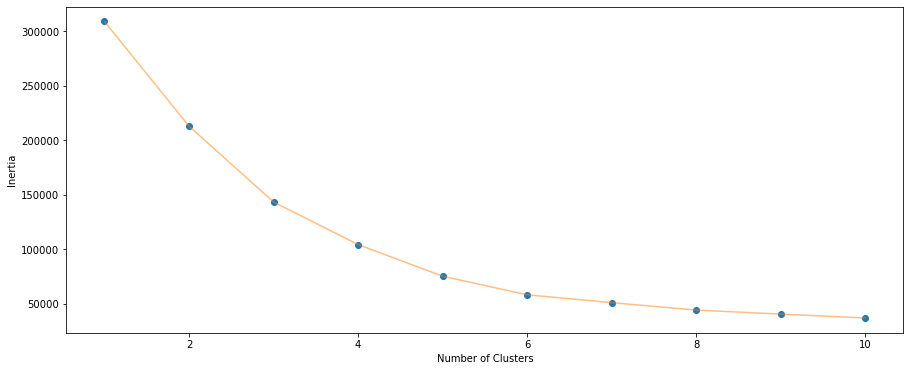

In [81]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [82]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [85]:
customers['label3'] =  labels3
trace1 = go.Scatter3d(
    x= customers['Age'],
    y= customers['Spending Score (1-100)'],
    z= customers['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = customers['label3'], 
        size= 20,
        line=dict(
            color= customers['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
